In [1]:
import sys
sys.path.append("..")
import xarray as xr
import numpy as np
import seaborn
from LESutils import load_stats
from matplotlib import pyplot as plt
from RFM import recalc_err_array

# Determine windows for fitting
## Load RFM.nc, var4.nc, stats file

In [2]:
dnc = "/home/bgreene/simulations/RFM/u01_tw24_qw10_256/"
s = load_stats(dnc+"mean_stats_xyt_5-6h.nc")
RFM_var = xr.load_dataset(dnc+"RFM.nc")
var4 = xr.load_dataset(dnc+"variances_4_order.nc")
L = xr.load_dataset(dnc+"lengthscale.nc")
R = xr.load_dataset(dnc+"autocorr.nc")

Reading file: /home/bgreene/simulations/RFM/u01_tw24_qw10_256/mean_stats_xyt_5-6h.nc


## Plot u, w, theta, q

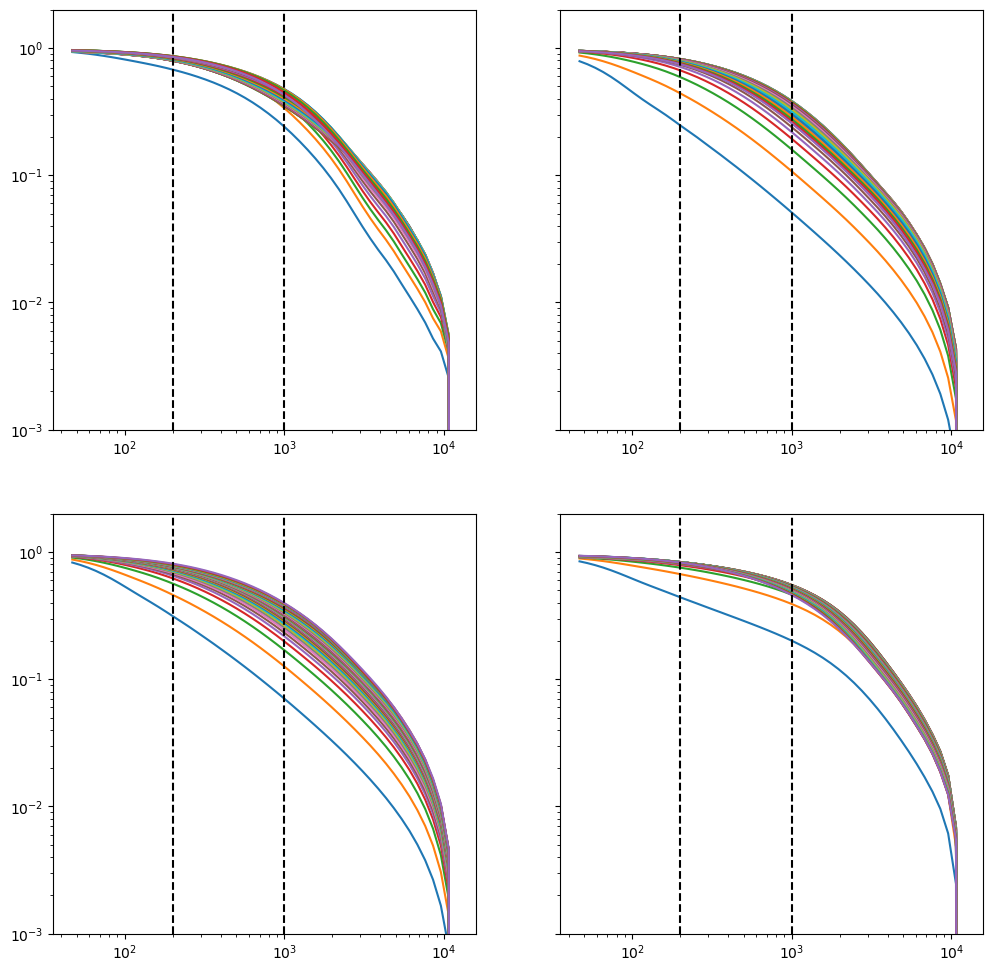

In [6]:
fig1, ax1 = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(12, 12))
for jz in np.arange(0, s.nzabl, 4):
    # u
    ax1[0,0].loglog(RFM_var.delta_x, 
                    RFM_var.u_rot.isel(z=jz)/s.u_var_rot.isel(z=jz),
                    label=f"z/zi={(s.z[jz]/s.h).values:4.3f}")
    # w
    ax1[0,1].loglog(RFM_var.delta_x, 
                    RFM_var.w.isel(z=jz)/s.w_var.isel(z=jz),
                    label=f"jz={jz}")
    # theta
    ax1[1,0].loglog(RFM_var.delta_x, 
                    RFM_var.theta.isel(z=jz)/s.theta_var.isel(z=jz))
    # q
    ax1[1,1].loglog(RFM_var.delta_x, 
                    RFM_var.q.isel(z=jz)/s.q_var.isel(z=jz))
    
ax1[0,0].set_ylim([1e-3, 2e0])

# ax1[0,0].set_ylim([1e1, 1e3])
# ax1[0,0].legend(loc="center left")
# ax1[0,1].legend(loc="center left")
# dx_fit_1 = np.array([500, 2000]) #* s.u_mean_rot[64].values
dx_fit_1 = np.array([200, 1000]) #* s.u_mean_rot[64].values
for iax in ax1.flatten():
    iax.axvline(dx_fit_1[0], c="k", ls="--")
    iax.axvline(dx_fit_1[1], c="k", ls="--")

# -1 power law
xx = np.array([1e2, 1e4])
yy = 300 * xx ** -1
# ax1[0,0].loglog(xx, yy, "c")

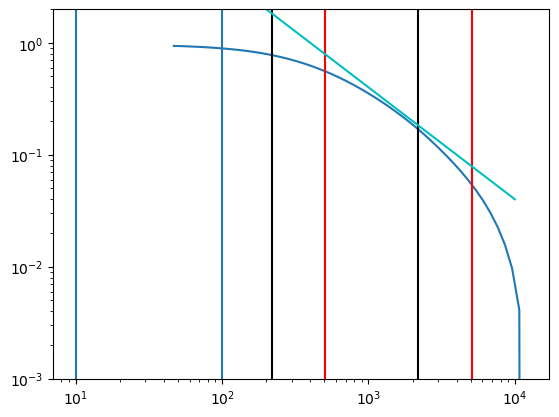

In [54]:
plt.loglog(RFM_var.delta_x, RFM_var.u_rot.isel(z=64)/s.u_var_rot[64])
plt.ylim([1e-3, 2e0])

l = Lall[-1]

plt.axvline(s.z[64], c="r")
plt.axvline(10*s.z[64], c="r")
plt.axvline(l.u_rot[64], c="k")
plt.axvline(10*l.u_rot[64], c="k")
# plt.axvline(1800*s.u_mean_rot[64], c="k")
plt.axvline(10)
plt.axvline(100)

# -1 power law
xx = np.array([1e2, 1e4])
yy = 400 * xx ** -1
plt.loglog(xx, yy, "c")

In [68]:
R.tw.isel(z=1, x=range(2)).integrate("x")

<xarray.DataArray 'tw' ()>
array(23.48193558)
Coordinates:
    z        float64 11.75

## Plot uw, tw, qw, uu, ww, tt

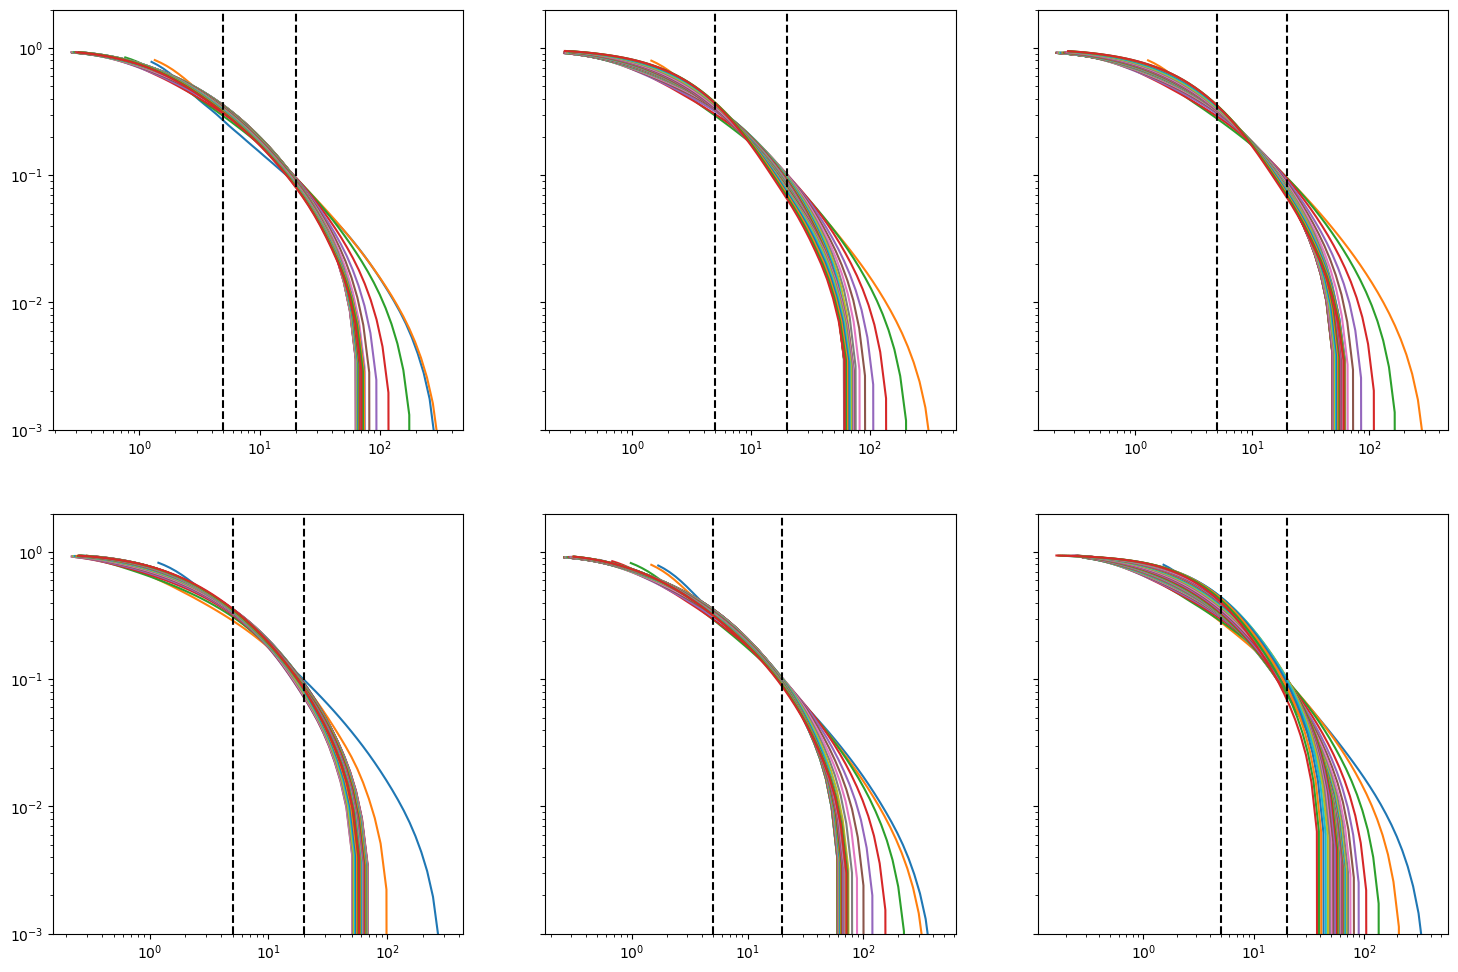

In [127]:
fig1, ax1 = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(18, 12))
for jz in np.arange(0, s.nzabl, 4):
    # uw
    ax1[0,0].loglog(RFM_var.delta_x/L.uw.isel(z=jz), 
                    RFM_var.uw.isel(z=jz)/var4.uwuw_var.isel(z=jz),
                    label=f"z/zi={(s.z[jz]/s.h).values:4.3f}")
    # tw
    ax1[0,1].loglog(RFM_var.delta_x/L.tw.isel(z=jz), 
                    RFM_var.tw.isel(z=jz)/var4.twtw_var.isel(z=jz),
                    label=f"jz={jz}")
    # qw
    ax1[0,2].loglog(RFM_var.delta_x/L.qw.isel(z=jz), 
                    RFM_var.qw.isel(z=jz)/var4.qwqw_var.isel(z=jz))
    # uu
    ax1[1,0].loglog(RFM_var.delta_x/L.uu.isel(z=jz), 
                    RFM_var.uu.isel(z=jz)/var4.uuuu_var.isel(z=jz))
    # ww
    ax1[1,1].loglog(RFM_var.delta_x/L.ww.isel(z=jz), 
                    RFM_var.ww.isel(z=jz)/var4.wwww_var.isel(z=jz))
    # tt
    ax1[1,2].loglog(RFM_var.delta_x/L.tt.isel(z=jz), 
                    RFM_var.tt.isel(z=jz)/var4.tttt_var.isel(z=jz))
    
ax1[0,0].set_ylim([1e-3, 2e0])
# ax1[0,0].legend(loc="center left")
# ax1[0,1].legend(loc="center left")
dx_fit_2 = [5, 20]
for iax in ax1.flatten():
    iax.axvline(dx_fit_2[0], c="k", ls="--")
    iax.axvline(dx_fit_2[1], c="k", ls="--")

# Load Data

In [2]:
# directories
# figure save
figdir = "/home/bgreene/CBL-DOE/figures/RFM/"
# list of simulations to loop over
sims = ["u15_tw03_qw01_256", "u15_tw10_qw04_256", "u15_tw24_qw10_256", 
        "u09_tw24_qw10_256", "u01_tw24_qw10_256"]
# empty list to construct paths and store
dnc_all = []
sall = []
Lall = []
Aall = []
err = []
err_LP = []
Call, pall = [], []
# loop over sims and load stats, spectrogram data
for sim in sims:
    dnc = f"/home/bgreene/simulations/RFM/{sim}/"
    dnc_all.append(dnc)
    # load stats file
    s = load_stats(dnc+"mean_stats_xyt_5-6h.nc")
    # add labels using -zi/L
    ziL = -1 * (s.h/s.L).values
    s.attrs["ziL"] = f"$-z_i/L = {ziL:.1f}$"
    sall.append(s)
    # load integral lengthscales
    l = xr.load_dataset(dnc+"lengthscale.nc")
    Lall.append(l)
    # load autocorr files
    a = xr.load_dataset(dnc+"autocorr.nc")
    Aall.append(a)
    # load error files
    e = xr.load_dataset(dnc+"err.nc")
    err.append(e)
    # load error files - LP
    e_LP = xr.load_dataset(dnc+"err_LP.nc")
    err_LP.append(e_LP)
    # load RFM coefficients
    Call.append(xr.load_dataset(dnc+"fit_C.nc"))
    pall.append(xr.load_dataset(dnc+"fit_p.nc"))
    
# define colormap based on number of simulations
nsim = len(sims)
cmap = seaborn.color_palette("cubehelix_r", nsim)
colors = seaborn.color_palette("crest", nsim)

Reading file: /home/bgreene/simulations/RFM/u15_tw03_qw01_256/mean_stats_xyt_5-6h.nc
Reading file: /home/bgreene/simulations/RFM/u15_tw10_qw04_256/mean_stats_xyt_5-6h.nc
Reading file: /home/bgreene/simulations/RFM/u15_tw24_qw10_256/mean_stats_xyt_5-6h.nc
Reading file: /home/bgreene/simulations/RFM/u09_tw24_qw10_256/mean_stats_xyt_5-6h.nc
Reading file: /home/bgreene/simulations/RFM/u01_tw24_qw10_256/mean_stats_xyt_5-6h.nc


Text(0.5, 0, '$\\epsilon_{wspd}^{LP}$ [%]')

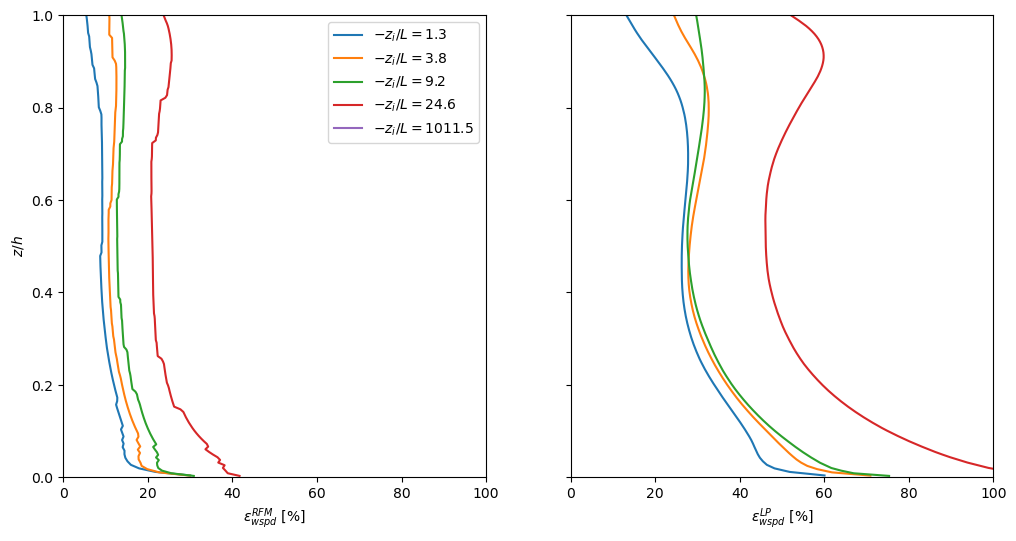

In [7]:
# plot mean wind speed profiles
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12,6))
# loop over simulations
for s, e, eLP in zip(sall, err, err_LP):
    ax[0].plot(100*e.wspd, e.z/s.h, label=s.ziL)
    ax[1].plot(100*eLP.wspd, eLP.z/s.h, label=s.ziL)
ax[0].set_ylim([0, 1])
ax[0].set_xlim([0, 100])
ax[0].legend()
ax[0].set_ylabel("$z/h$")
ax[0].set_xlabel("$\\epsilon_{wspd}^{RFM}$ [%]")
ax[1].set_xlabel("$\\epsilon_{wspd}^{LP}$ [%]")

Text(0.5, 0, '$\\epsilon_{q}^{LP}$ [%]')

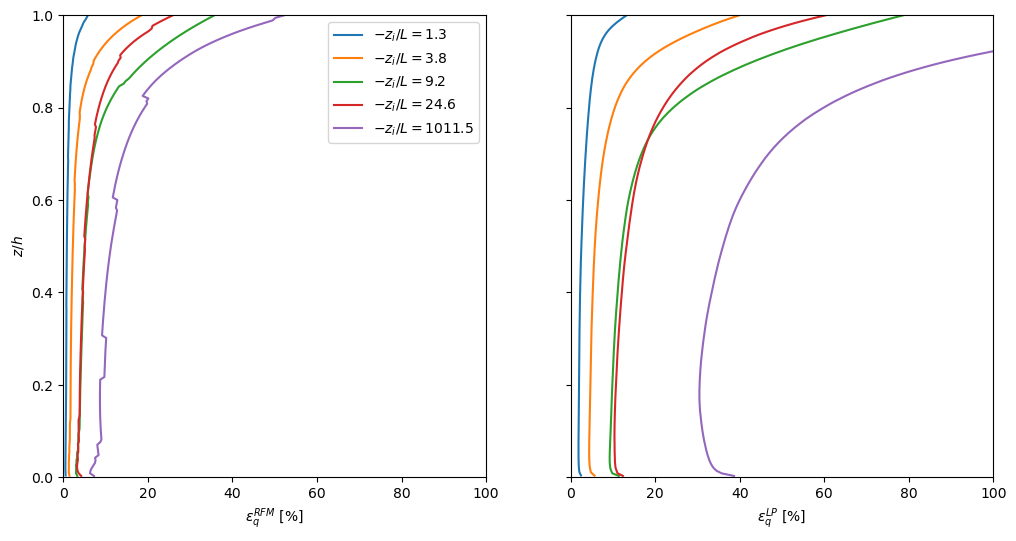

In [4]:
# plot mean wind speed profiles
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12,6))
# loop over simulations
for s, e, eLP in zip(sall, err, err_LP):
    ax[0].plot(100*e.q, e.z/s.h, label=s.ziL)
    ax[1].plot(100*eLP.q, eLP.z/s.h, label=s.ziL)
ax[0].set_ylim([0, 1])
ax[0].set_xlim([0, 100])
ax[0].legend()
ax[0].set_ylabel("$z/h$")
ax[0].set_xlabel("$\\epsilon_{q}^{RFM}$ [%]")
ax[1].set_xlabel("$\\epsilon_{q}^{LP}$ [%]")

Text(0.5, 0, '$\\epsilon_{ww}^{LP}$ [%]')

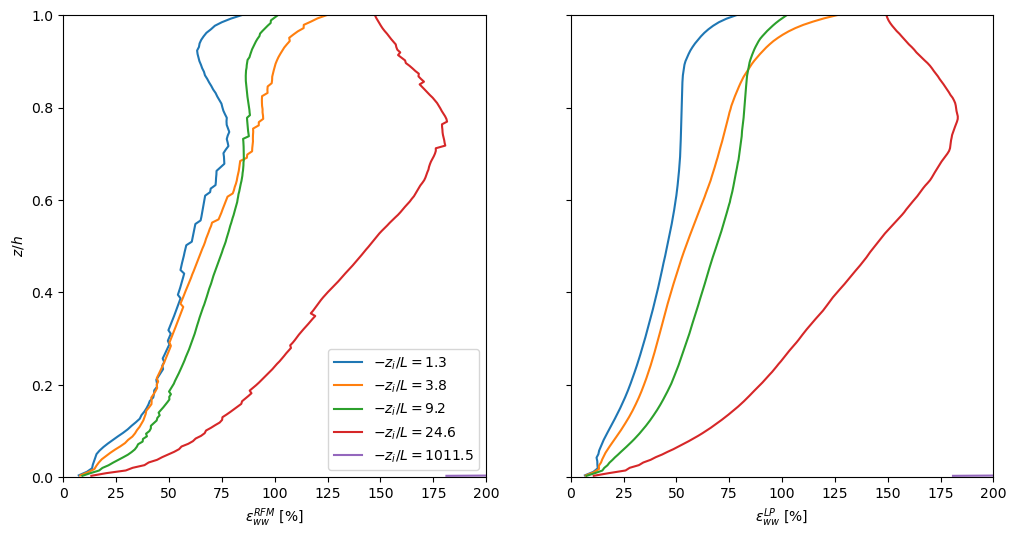

In [5]:
# plot mean wind speed profiles
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12,6))
# loop over simulations
for s, e, eLP in zip(sall, err, err_LP):
    ax[0].plot(100*e.ustar2, e.z/s.h, label=s.ziL)
    ax[1].plot(100*eLP.ustar2, eLP.z/s.h, label=s.ziL)
ax[0].set_ylim([0, 1])
ax[0].set_xlim([0, 200])
ax[0].legend()
ax[0].set_ylabel("$z/h$")
ax[0].set_xlabel("$\\epsilon_{ww}^{RFM}$ [%]")
ax[1].set_xlabel("$\\epsilon_{ww}^{LP}$ [%]")

Text(0.5, 0, '$\\mathcal{L}_q/z_i$')

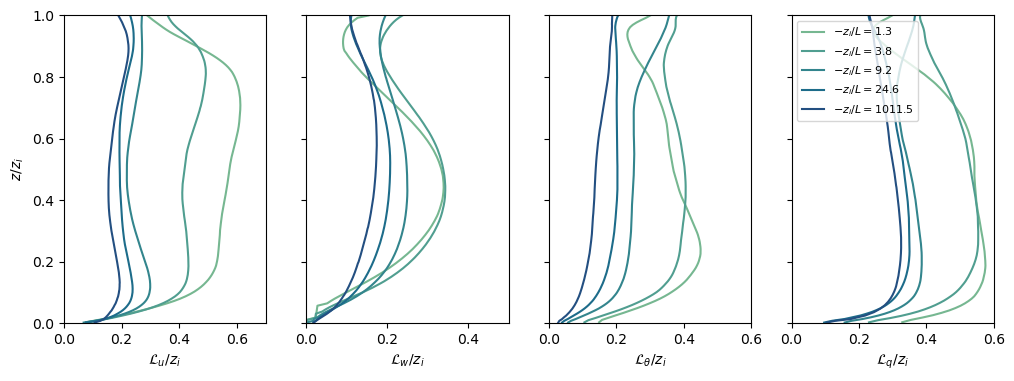

In [26]:
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(12, 4))
for js, (l, s) in enumerate(zip(Lall, sall)):
    # u
    ax[0].plot(l.u_rot/s.h, l.z/s.h, c=colors[js], label=s.ziL)
    # w
    ax[1].plot(l.w/s.h, l.z/s.h, c=colors[js])
    # theta
    ax[2].plot(l.theta/s.h, l.z/s.h, c=colors[js])
    # q
    ax[3].plot(l.q/s.h, l.z/s.h, c=colors[js], label=s.ziL)

ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$z/z_i$")
ax[3].legend(fontsize=8, loc="upper left")
ax[0].set_xlim([0, 0.7])
ax[0].set_xlabel(r"$\mathcal{L}_u/z_i$")
ax[1].set_xlim([0, 0.5])
ax[1].set_xlabel(r"$\mathcal{L}_w/z_i$")
ax[2].set_xlim([0, 0.6])
ax[2].set_xlabel(r"$\mathcal{L}_\theta/z_i$")
ax[3].set_xlim([0, 0.6])
ax[3].set_xlabel(r"$\mathcal{L}_q/z_i$")

## Recalc errors with array of times

In [2]:
dnc = "/home/bgreene/simulations/RFM/u15_tw24_qw10_256/"
s = load_stats(dnc+"mean_stats_xyt_5-6h.nc")
RFM_var = xr.load_dataset(dnc+"RFM.nc")
var4 = xr.load_dataset(dnc+"variances_4_order.nc")
L = xr.load_dataset(dnc+"lengthscale.nc")
C = xr.load_dataset(dnc+"fit_C.nc")
p = xr.load_dataset(dnc+"fit_p.nc")

Tnew = np.arange(0.1, 15.1, 0.1)
err = recalc_err_array(Tnew, var4, s, C, p, L)

Reading file: /home/bgreene/simulations/RFM/u15_tw24_qw10_256/mean_stats_xyt_5-6h.nc
Computing errors for: u
Computing errors for: v
Computing errors for: theta
Computing errors for: q
Computing errors for: thetav


In [3]:
err.u

<xarray.DataArray 'u' (z: 176, Tsample: 150)>
array([[1.0632089 , 0.87025266, 0.77405046, ..., 0.25095108, 0.2504633 ,
        0.24997973],
       [0.72537026, 0.61140212, 0.5532272 , ..., 0.21153477, 0.21118379,
        0.21083573],
       [0.61384056, 0.52321604, 0.47654021, ..., 0.19404529, 0.19374439,
        0.19344596],
       ...,
       [0.48911473, 0.39530121, 0.3490031 , ..., 0.10535659, 0.10513885,
        0.10492301],
       [0.48299671, 0.3906462 , 0.34504292, ..., 0.10459643, 0.10438101,
        0.10416747],
       [0.47676571, 0.38589216, 0.3409915 , ..., 0.10379959, 0.10358656,
        0.10337539]])
Coordinates:
  * z        (z) float64 3.906 11.75 19.59 ... 1.361e+03 1.369e+03 1.376e+03
  * Tsample  (Tsample) float64 0.1 0.2 0.3 0.4 0.5 ... 14.6 14.7 14.8 14.9 15.0